<h1>Análisis exploratorio de datos</h1>

<b>Ejercicio I:</b>
Imagine que una nueva compañía de automóviles quiere producir su primer automóvil, es importante que el carro sea ecológico y económico, pero también fuerte y cómodo. La compañía quiere predecir qué emisión de CO2 y consumo de combustible pueden esperarse para un automóvil con un tamaño de motor dado, número de cilindros, transmisión, entre otros parámetros.

Antes de aplicar la regresión, los gerentes quieren ver el informe sobre los datos que se utilizarán para entrenar el algoritmo de aprendizaje automático; además, quieren saber qué tecnología utilizar (americana, europea o asiática).

Recuerde, ¡el elemento más importante de la ciencia de datos es... PENSAR!

Este ejercicio debe permitirle sentirse cómodo con la herramienta de manipulación de datos: Pandas. Luego PIENSE, qué otra información sería interesante extraer del conjunto de datos, qué otros datos desea tener para que el análisis sea más completo.

https://raw.githubusercontent.com/mhemmg/datasets/master/car_emission/cars_CO2_emissions_D.csv - contiene las marcas y parámetros del automóvil.
https://raw.githubusercontent.com/mhemmg/datasets/master/car_emission/car_brands_countries.csv - contiene las marcas de automóviles y el coutry (continente) de origen.


<h2>Detalles del conjunto de datos</h2>
Este conjunto de datos captura los detalles de cómo las emisiones de CO2 de un vehículo pueden variar con las diferentes características. El conjunto de datos se tomó del sitio web oficial de datos abiertos del gobierno de Canadá, esta es una versión compilada y contiene datos de un período de 7 años.

Hay un total de 7385 filas y 12 columnas, además se han utilizado pocas abreviaturas para describir las características. A continuación se enumeran; no obstante, la misma información se encuentra en la hoja de Descripción de Datos.


1. Model :
4WD/4X4 = Four-wheel drive
AWD = All-wheel drive
FFV = Flexible-fuel vehicle
SWB = Short wheelbase
LWB = Long wheelbase
EWB = Extended wheelbase

2. Transmission :
A = automatic
AM = automated manual
AS = automatic with select shift
AV = continuously variable
M = manual
3-10 = number of gears

3. Fuel type :
X = regular gasoline
Z = premium gasoline
D = diesel
E = ethanol (E85)
N = natural gas

4. Fuel consumption :
City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)

5. Estimated tailpipe carbon dioxide emission in grams/km
Los datos han sido tomados y compilados de este enlace oficial del Gobierno de Canadá: https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6





In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

<h3> 1. Carga y limpieza de los datos </h3>
<b> a) Complete el conjunto de datos de la emisión de CO2 del automóvil con los datos sobre el origen de las marcas.</b>

In [24]:
df1= pd.read_csv("car_brands_countries.csv")
df2= pd.read_csv("cars_CO2_emissions_D.csv")
df = pd.merge(left=df2,right=df1, left_on='Make', right_on='Make')

<b> b) Del conjunto de datos dado imprima las primeras y las últimas diez filas.</b>

In [25]:
#Imprimiendo las 10 primeras filas 
df.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Country,Continent
0,ACURA,ILX,COMPACT,2.0,4.0,AS5,premium gasoline,9.9,6.7,8.5,33.0,196.0,USA,America
1,ACURA,ILX,COMPACT,2.4,4.0,M6,premium gasoline,11.2,7.7,9.6,29.0,221.0,USA,America
2,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,premium gasoline,6.0,5.8,5.9,48.0,136.0,USA,America
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,premium gasoline,12.7,9.1,11.1,25.0,255.0,USA,America
4,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,premium gasoline,12.1,8.7,10.6,27.0,244.0,USA,America
5,ACURA,RLX,MID-SIZE,3.5,6.0,AS6,premium gasoline,11.9,7.7,10.0,28.0,230.0,USA,America
6,ACURA,TL,MID-SIZE,3.5,6.0,AS6,premium gasoline,11.8,8.1,10.1,28.0,232.0,USA,America
7,ACURA,TL AWD,MID-SIZE,3.7,6.0,AS6,premium gasoline,12.8,9.0,11.1,25.0,255.0,USA,America
8,ACURA,TL AWD,MID-SIZE,3.7,6.0,M6,premium gasoline,13.4,9.5,11.6,24.0,267.0,USA,America
9,ACURA,TSX,COMPACT,2.4,4.0,AS5,premium gasoline,10.6,7.5,9.2,31.0,212.0,USA,America


In [26]:
#Imprimiendo las 10 últimas filas
df.tail(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Country,Continent
6267,GENESIS,G80 AWD,FULL-SIZE,5.0,8.0,AS8,premium gasoline,15.6,10.4,13.2,21.0,312.0,USA,America
6268,GENESIS,G70,COMPACT,2.0,4.0,M6,premium gasoline,12.8,8.5,10.9,26.0,255.0,USA,America
6269,GENESIS,G70 AWD,COMPACT,2.0,4.0,AS8,premium gasoline,11.5,8.7,10.3,27.0,241.0,USA,America
6270,GENESIS,G70 AWD,COMPACT,3.3,6.0,AS8,premium gasoline,13.3,9.5,11.6,24.0,274.0,USA,America
6271,GENESIS,G70 AWD,COMPACT,2.0,4.0,AS8,premium gasoline,11.4,8.6,10.2,28.0,238.0,USA,America
6272,GENESIS,G70 AWD,COMPACT,3.3,6.0,AS8,premium gasoline,14.1,9.5,12.0,24.0,284.0,USA,America
6273,GENESIS,G90 AWD,FULL-SIZE,3.3,6.0,AS8,premium gasoline,13.6,9.5,11.8,24.0,280.0,USA,America
6274,GENESIS,G90 AWD,FULL-SIZE,5.0,8.0,AS8,premium gasoline,15.4,10.2,13.1,22.0,311.0,USA,America
6275,BUGATTI,CHIRON,TWO-SEATER,8.0,16.0,AM7,premium gasoline,26.8,16.6,22.2,13.0,522.0,Italy,Europe
6276,BUGATTI,Chiron,TWO-SEATER,8.0,16.0,AM7,premium gasoline,26.8,16.6,22.2,13.0,522.0,Italy,Europe


<b>c) Muestre todos los nombres de las columnas del conjunto de datos.</b>

In [27]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)', 'Country',
       'Continent'],
      dtype='object')

<b> d) Cuente el número de columnas y el número de filas.</b>

In [28]:
print("Número de filas: " + str(len(df.axes[0]))) 
print("Número de Columnas: " + str(len(df.axes[1]) ))

Número de filas: 6277
Número de Columnas: 14


<b>e) Reemplace todos los valores de columna que contengan "?" o valores vacíos con valores NaN. </b>

In [29]:
df=df.replace(to_replace={'?':np.nan,' ':np.nan})

<b> f) Cuente las entradas de valores NaN y elimine las filas con NaN. </b>

In [30]:
#Contando las entradas con valores Nan
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      1
Cylinders                           0
Transmission                        2
Fuel Type                           0
Fuel Consumption City (L/100 km)    1
Fuel Consumption Hwy (L/100 km)     2
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
Country                             0
Continent                           0
dtype: int64

In [31]:
##Eliminando las filas con Nan
df = df.dropna()
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
Country                             0
Continent                           0
dtype: int64

<b> g) Cuente las filas repetidas y elimínelas. </b>

In [32]:
NumFilasDuplicadas=df.duplicated().sum()
print("Hay {} filas duplicadas".format(NumFilasDuplicadas))

Hay 0 filas duplicadas


<h3>2. Adición y cambio de las características </h3>

<b>a) Cambie los nombres de la gasolina ('Fuel Type') a nombres más significativos (X = gasolina regular, Z = gasolina premium, D = diesel, E = etanol (E85), N = gas natural). </b>

In [33]:
df.head(3)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Country,Continent
0,ACURA,ILX,COMPACT,2.0,4.0,AS5,premium gasoline,9.9,6.7,8.5,33.0,196.0,USA,America
1,ACURA,ILX,COMPACT,2.4,4.0,M6,premium gasoline,11.2,7.7,9.6,29.0,221.0,USA,America
2,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,premium gasoline,6.0,5.8,5.9,48.0,136.0,USA,America


In [34]:
df=df.replace({'premium gasoline':'Z',
              'diesel':'D', 
              'regular gasoline':'X',  
              'ethanol':'E',
              'natural gas':'N'})

df["Fuel Type"].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

<b> b) Cree una nueva columna llamada 'Automatic / Manual' donde solo aparecerán valores de cadenas: A y M (extraiga dichos valores de la columna 'Transmission').</b>

In [35]:
df['Automatic / Manual'] = df['Transmission'].str.extract(r'([AM])')
df.head(2)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Country,Continent,Automatic / Manual
0,ACURA,ILX,COMPACT,2.0,4.0,AS5,Z,9.9,6.7,8.5,33.0,196.0,USA,America,A
1,ACURA,ILX,COMPACT,2.4,4.0,M6,Z,11.2,7.7,9.6,29.0,221.0,USA,America,M


<b> c) Cree una nueva columna llamada ' A / M digital' donde solo aparecerán valores numéricos: 1 / 0. Los valores enteros 1 y 0 serán valores correspondientes al carro con transmision automática o manual (tener una columna con el valor digital de la transmisión puede ser útil al realizar la regresión, porque la regresión usando scikit-learn funciona solo con valores numéricos). </b>

In [36]:
df['A / M digital']= df['Automatic / Manual'].replace({'A':1,'M':0})
df.head(2)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Country,Continent,Automatic / Manual,A / M digital
0,ACURA,ILX,COMPACT,2.0,4.0,AS5,Z,9.9,6.7,8.5,33.0,196.0,USA,America,A,1
1,ACURA,ILX,COMPACT,2.4,4.0,M6,Z,11.2,7.7,9.6,29.0,221.0,USA,America,M,0


<h3> 3. Extracción de información</h3>

<b> a) Cuente cuántas marcas de automóviles ("Make") están en el conjunto de datos.</b>

In [37]:
Marcas=len(df['Make'].unique())
print("En total hay {} marcas".format(Marcas))

En total hay 42 marcas


<b> b) Cuente el total de carros por marca y muestre las primeras diez marcas más comunes.</b>

In [38]:
Total_carrosMarca=df.groupby('Make').size()
Total_carrosMarca.sort_values(ascending=False)[:10]

Make
FORD             577
CHEVROLET        515
BMW              497
MERCEDES-BENZ    364
PORSCHE          296
GMC              289
TOYOTA           276
AUDI             261
NISSAN           213
MINI             200
dtype: int64

<b>c) Cuente el total de carros por marca y muestre las primeras diez marcas menos comunes. </b>

In [39]:
Total_carrosMarca.sort_values(ascending=False)[-10:]

Make
ROLLS-ROYCE     48
ASTON MARTIN    39
LAMBORGHINI     37
BENTLEY         35
SCION           21
ALFA ROMEO      19
GENESIS         14
SMART            8
BUGATTI          2
SRT              2
dtype: int64

<b> d) Muestre la fila entera para un coche con la menor emisión de CO2.</b>

In [40]:
df.nsmallest(1,columns='CO2 Emissions(g/km)')

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Country,Continent,Automatic / Manual,A / M digital
3078,HYUNDAI,IONIQ BLUE,FULL-SIZE,1.6,4.0,AM6,X,4.2,4.0,4.1,69.0,96.0,Korea,Asia,A,1


<b>e) Muestre la fila entera para un coche con la mayor emisión de CO2. </b>

In [41]:
df.nlargest(1,columns='CO2 Emissions(g/km)')

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Country,Continent,Automatic / Manual,A / M digital
6275,BUGATTI,CHIRON,TWO-SEATER,8.0,16.0,AM7,Z,26.8,16.6,22.2,13.0,522.0,Italy,Europe,A,1


<b> f) Encuentre la emisión media de C02 por marca. </b>

In [42]:
MedEmis_marca=df.groupby('Make')['CO2 Emissions(g/km)'].mean()
MedEmis_marca

Make
ACURA            221.260000
ALFA ROMEO       231.315789
ASTON MARTIN     344.282051
AUDI             252.318008
BENTLEY          367.914286
BMW              252.736419
BUGATTI          522.000000
BUICK            233.750000
CADILLAC         266.366906
CHEVROLET        264.477670
CHRYSLER         244.046875
DODGE            277.088889
FIAT             192.285714
FORD             261.285962
GENESIS          282.571429
GMC              300.529412
HONDA            191.262195
HYUNDAI          208.316940
INFINITI         254.011494
JAGUAR           272.743590
JEEP             250.795000
KIA              213.796875
LAMBORGHINI      402.270270
LAND ROVER       288.078947
LEXUS            242.124031
LINCOLN          265.814815
MASERATI         318.134615
MAZDA            192.755906
MERCEDES-BENZ    278.623626
MINI             196.570000
MITSUBISHI       200.095890
NISSAN           237.375587
PORSCHE          259.192568
RAM              294.180556
ROLLS-ROYCE      388.750000
SCION          

<b> g) Encuentre la emisión media de C02 por continente. </b>

In [43]:
df.groupby('Continent')['CO2 Emissions(g/km)'].mean()

Continent
America    266.135902
Asia       216.030728
Europe     258.256219
Name: CO2 Emissions(g/km), dtype: float64

<h3> 4. Trazado</h3>

<b> a) Realice un 'boxplot' (diagrama de caja) comparando la emisión de los carros por continentes: América, Europa, Asia (añadir línea media para comparación). </b>

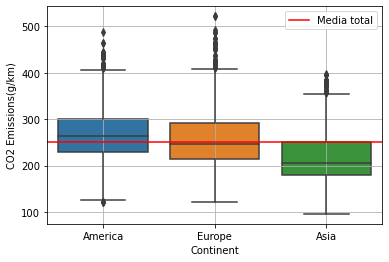

In [46]:
meanEmission = df['CO2 Emissions(g/km)'].mean()
#sns.set(style="whitegrid")
#sns.set(rc={'figure.figsize':(11,8)})
sns.boxplot(x=df['Continent'], y=df['CO2 Emissions(g/km)'])
plt.axhline(y=meanEmission, color='r', linestyle='-', label='Media total')
plt.grid()
plt.legend()

<b> b) Realice un 'boxplot' (diagrama de caja) comparando la emisión de los carros por transmisión (dos grupos: manual y automática. Añadir línea media para comparación). </b>

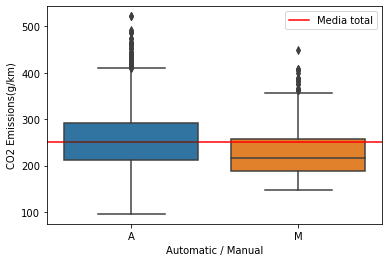

In [47]:
sns.boxplot(x=df['Automatic / Manual'], y=df['CO2 Emissions(g/km)'])
plt.axhline(y=meanEmission, color='r', linestyle='-', label='Media total')
plt.legend()

<b>c) Realice un 'boxplot' (diagrama de caja) comparando la emisión de los carros por tipo de combustible (añadir línea media para comparación). </b>

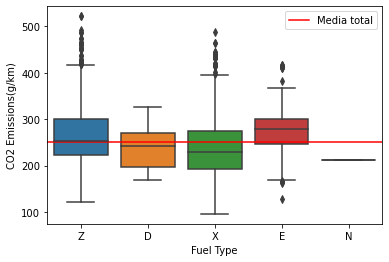

In [48]:
sns.boxplot(x=df['Fuel Type'], y=df['CO2 Emissions(g/km)'])
plt.axhline(y=meanEmission, color='r', linestyle='-', label='Media total')
plt.legend()

<b> d) Realice un 'countplot' de conteo de automóviles con transmisión manual y automática (solo dos grupos).</b>

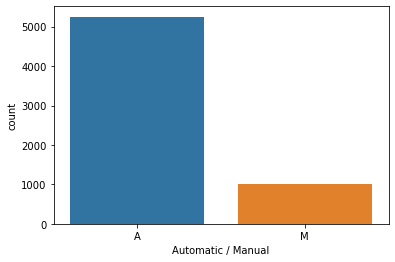

In [49]:
sns.countplot(x="Automatic / Manual", data=df)

<b> e) Realice un 'barplot' de una emisión promedio de CO2 por marca de automóvil (de menor a mayor).</b>

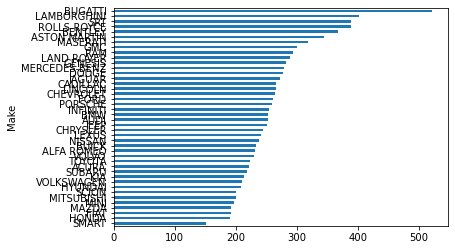

In [50]:
#df.groupby('Make')['CO2 Emissions(g/km)'].mean().sort_values().plot.barh()

MedEmis_marca.sort_values().plot.barh()

<b> f) Ordene el conjunto de datos por marca y emisión de CO2 y guárdelo en el archivo CSV (preferiblemente sin guardar el número de índice).</b>

In [51]:
df_sort = df.sort_values(by=['Make', 'CO2 Emissions(g/km)']).reset_index(drop=True)
df_sort.to_csv('dfCars_sort.csv')

<h3> Ejercicio II: utilice este gran conjunto de datos históricos sobre los Juegos Olímpicos modernos, incluidos todos los Juegos desde Atenas 1896 hasta Río 2016.</h3>

In [52]:
df_ath=pd.read_csv("athlete_events.csv")
df_ath.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


<b> 1. Mirando un deporte particular: remo - rowing, ver si la edad de las medallistas de oro femeninas está aumentando o disminuyendo a través de los tiempos. Realize un plot para muestrar la tendencia (si hay una)</b>

In [53]:
cond = (df_ath.Sport=='Rowing') & (df_ath.Sex=='F') & (df_ath.Medal=='Gold') 
FemGoldAth= df_ath[cond]
FemGoldAth.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2577,1443,Brigitte Ahrenholz,F,23.0,178.0,85.0,East Germany,GDR,1976 Summer,1976,Summer,Montreal,Rowing,Rowing Women's Coxed Eights,Gold
4380,2495,Larisa Aleksandrova-Popova,F,23.0,180.0,83.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Rowing,Rowing Women's Double Sculls,Gold


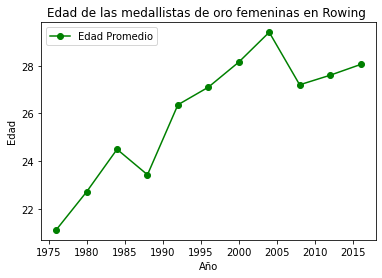

In [54]:
edadmed_año=FemGoldAth.groupby('Year')['Age'].mean()
plt.title('Edad de las medallistas de oro femeninas en Rowing ')
plt.plot(edadmed_año, 'go-', label='Edad Promedio')
plt.xlabel('Año')
plt.ylabel('Edad')
plt.legend()


<b> 2. Sea creativo y extrae algunas informaciones interesantes de este conjunto. </b>

In [55]:
df_ath.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [56]:
df_ath["Sport"].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

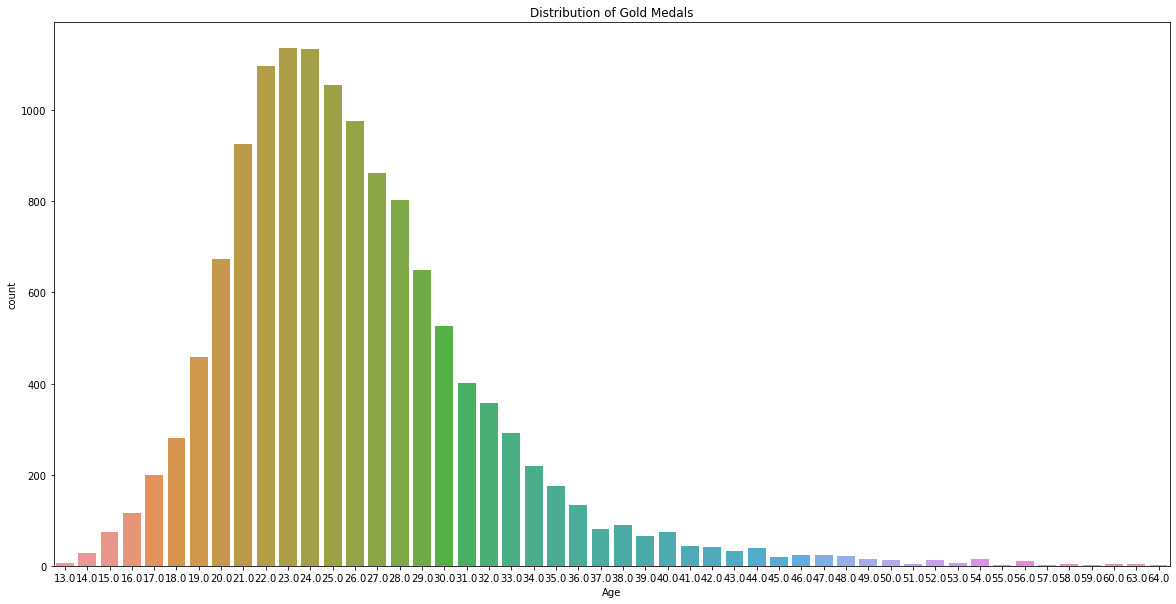

In [57]:
GoldMed=df_ath[(df_ath.Medal == "Gold")]

plt.figure(figsize=(20, 10))
plt.title('Distribution of Gold Medals')
sns.countplot(GoldMed['Age'])
plt.show()

Se puede notar que el pico de medallas de oro se encuentra cerca a los 24 años y disminuye a medida que aumenta la edad de los participantes, esto puede tener que ver con el retiro de los deportistas a partir de ciertas edades. El otro lado de la gaussiana da cuenta de la edad aproximada a la que inician a participar los deportistas en estos eventos

<Figure size 3600x2880 with 0 Axes>

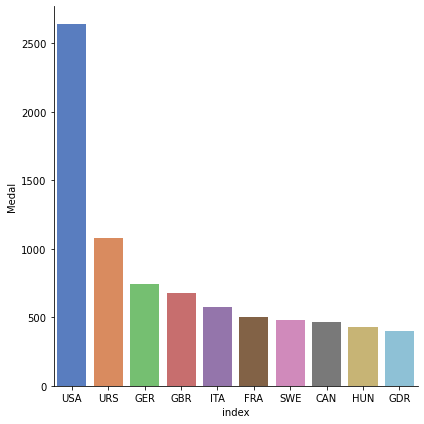

In [58]:
GoldMedTotalNOC=GoldMed.NOC.value_counts().reset_index(name='Medal').head(10)
plt.figure(figsize=(50, 40))
sns.catplot(x="index", y="Medal", data=GoldMedTotalNOC,
                height=6, kind="bar", palette="muted")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

<Figure size 3600x2880 with 0 Axes>

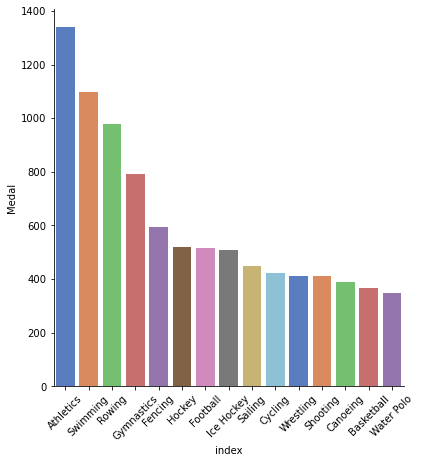

In [59]:
GoldMedtotalSport=GoldMed["Sport"].value_counts().reset_index(name='Medal').head(15)

plt.figure(figsize=(50, 40))
sns.catplot(x="index", y="Medal", data=GoldMedtotalSport,
                height=6, kind="bar", palette="muted")
plt.xticks(rotation = 45)

Analizando ahora el comportamiento de las medallistas de oro de genero femenino

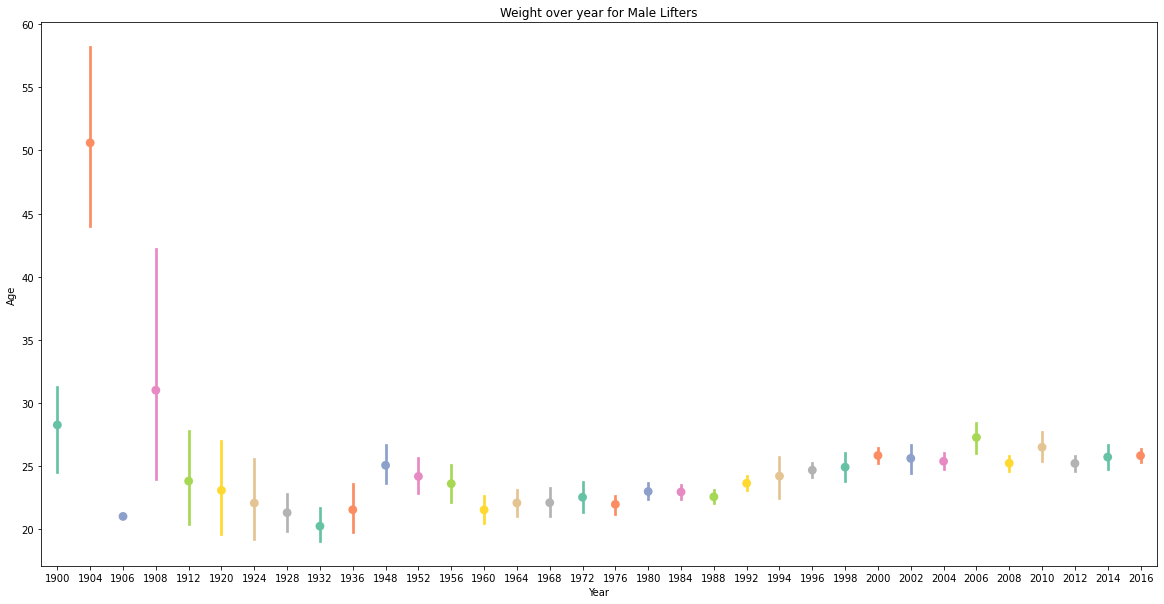

In [60]:
GoldMedFem=df_ath[(df_ath.Medal == "Gold") & (df_ath.Sex == 'F')]
plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Age', data=GoldMedFem, palette='Set2')
plt.title('Weight over year for Male Lifters')
plt.show()

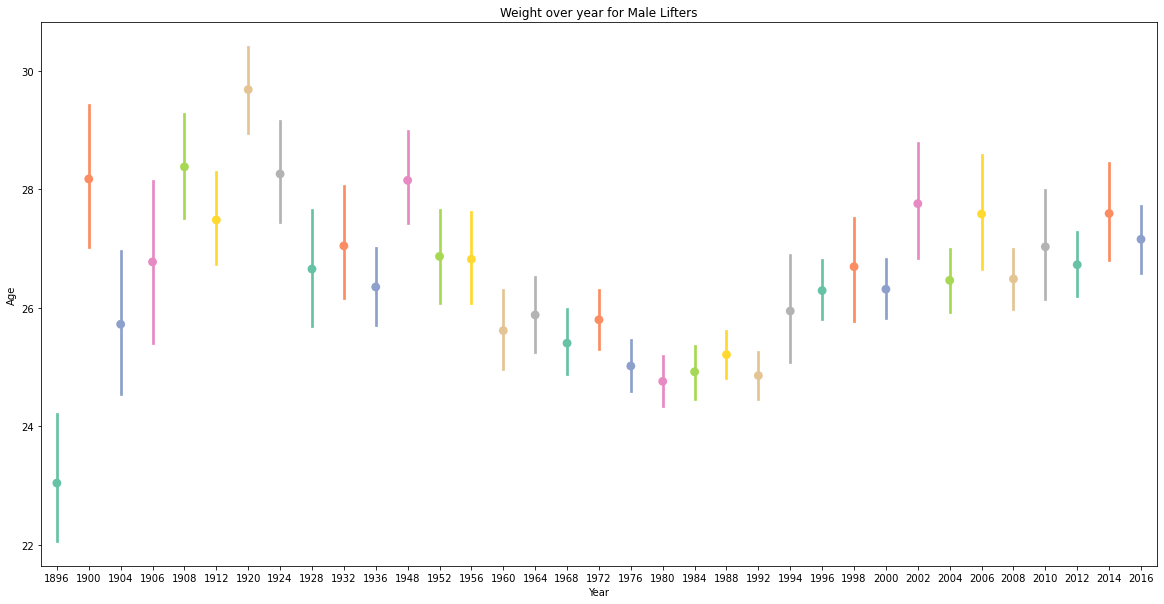

In [61]:
GoldMedMas=df_ath[(df_ath.Medal == "Gold") & (df_ath.Sex == 'M')]
plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Age', data=GoldMedMas, palette='Set2')
plt.title('Weight over year for Male Lifters')
plt.show()

Las edades de las medallistas estan en un intervalo de 22 y 30 años. Se puede notar como para algunos años la edad promedio ha dismiuido, rondando siempre los 25 años